## 4.1

In [1]:
%matplotlib inline
from pathlib import Path
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pylab as plt

In [2]:
cereals = pd.read_csv('Cereals.csv')

In [3]:
cereals

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


In [4]:
#a 양적 수치적 변수인가 
## 범주형 변수는 순서형과 명목형으로 나뉨

In [5]:
cereals.head(10)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.00,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.00,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.00,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.00,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.00,0.75,34.384843
5,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.00,0.75,29.509541
6,Apple_Jacks,K,C,110,2,0,125,1.0,11.0,14.0,30.0,25,2,1.00,1.00,33.174094
7,Basic_4,G,C,130,3,2,210,2.0,18.0,8.0,100.0,25,3,1.33,0.75,37.038562
8,Bran_Chex,R,C,90,2,1,200,4.0,15.0,6.0,125.0,25,1,1.00,0.67,49.120253
9,Bran_Flakes,P,C,90,3,0,210,5.0,13.0,5.0,190.0,25,3,1.00,0.67,53.313813


In [6]:
cereals.dtypes

name         object
mfr          object
type         object
calories      int64
protein       int64
fat           int64
sodium        int64
fiber       float64
carbo       float64
sugars      float64
potass      float64
vitamins      int64
shelf         int64
weight      float64
cups        float64
rating      float64
dtype: object

In [7]:
cereals.mfr = cereals.mfr.astype('category') 
print(cereals.mfr.cat.categories)   ## 범주형 변수중, 명목형에 해당

Index(['A', 'G', 'K', 'N', 'P', 'Q', 'R'], dtype='object')


In [8]:
cereals.type = cereals.type.astype('category') 
print(cereals.type.cat.categories)  ## 범주형 변수중, 명목형에 해당

Index(['C', 'H'], dtype='object')


type과 mfr을 제외한 나머지 변수들은 모두 수치형에 해당된다.

In [9]:
#b 각각의 양적 변수에 대해 평균, 중앙, 최소, 최대, 표준편차 계산

In [10]:
cereals.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,76.000000,76.000000,75.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.802632,7.026316,98.666667,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,3.907326,4.378656,70.410636,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,42.500000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.500000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [11]:
#c 양적 변수에 대해 각각 히스토그램 작성

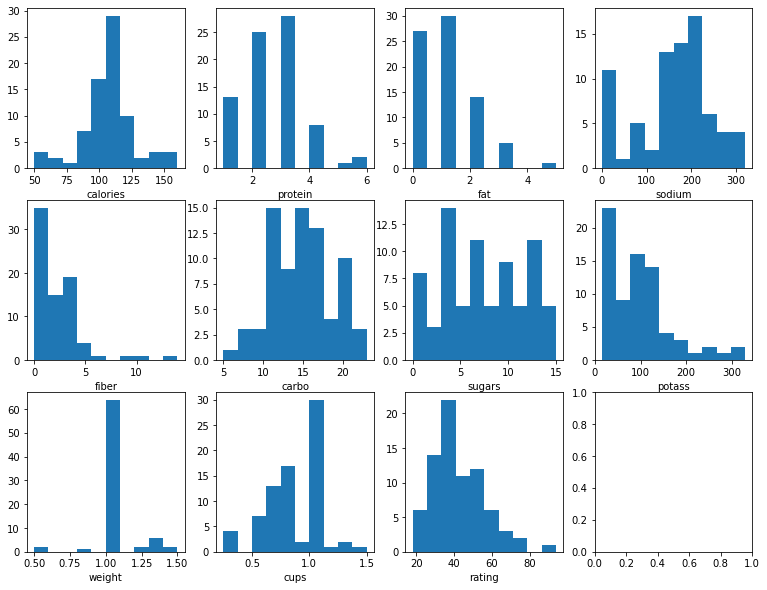

In [69]:
## 추가 코드

c1_name = [['calories','protein','fat','sodium'],['fiber','carbo','sugars','potass'],
          ['weight','cups','rating']]
fig, ax = plt.subplots(nrows = 3,ncols = 4)

for i in range(3): #행
    for j in range(4): #열
        if i==2 and j==3 :
            break
        ax[i][j].hist(cereals[c1_name[i][j]])
        ax[i][j].set_xlabel(c1_name[i][j])

fig.set_size_inches(13,10)
plt.show()


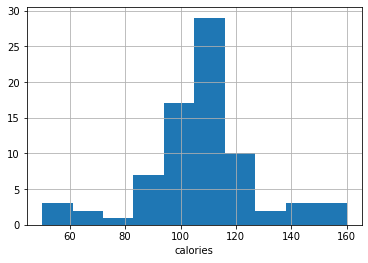

In [12]:
ax = cereals.calories.hist()
ax.set_xlabel('calories')

plt.show()

Text(0.5, 0, 'protein')

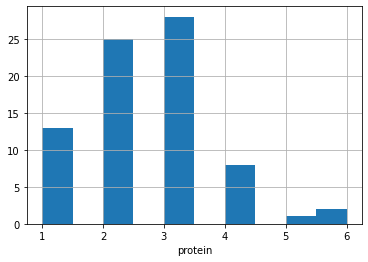

In [13]:
ax2 = cereals.protein.hist()
ax2.set_xlabel('protein')

Text(0.5, 0, 'fat')

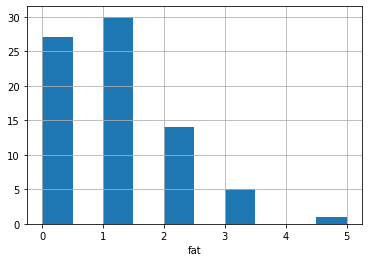

In [14]:
ax3 = cereals.fat.hist()
ax3.set_xlabel('fat')


Text(0.5, 0, 'sodium')

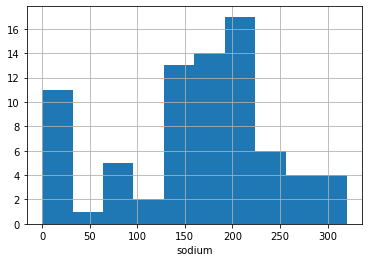

In [15]:
ax4 = cereals.sodium.hist()
ax4.set_xlabel('sodium')

Text(0.5, 0, 'fiber')

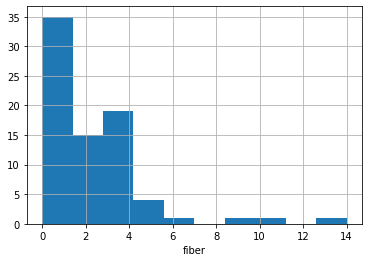

In [16]:
ax5 = cereals.fiber.hist()
ax5.set_xlabel('fiber')

Text(0.5, 0, 'carbo')

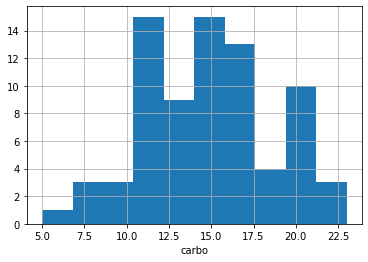

In [17]:
ax6 = cereals.carbo.hist()
ax6.set_xlabel('carbo')

Text(0.5, 0, 'sugars')

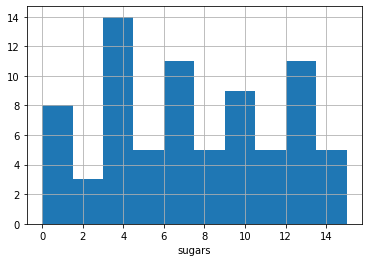

In [18]:
ax7 = cereals.sugars.hist()
ax7.set_xlabel('sugars')

Text(0.5, 0, 'potass')

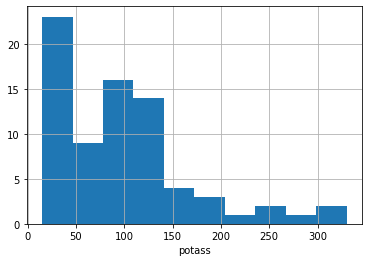

In [19]:
ax8 = cereals.potass.hist()
ax8.set_xlabel('potass')

Text(0.5, 0, 'weight')

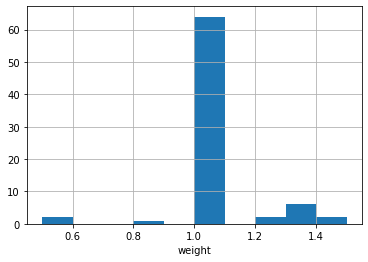

In [20]:
ax9 = cereals.weight.hist()
ax9.set_xlabel('weight')

Text(0.5, 0, 'cups')

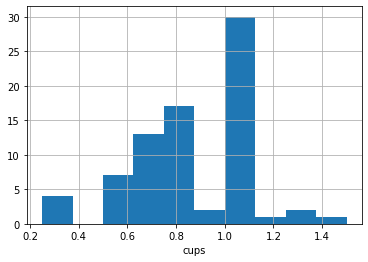

In [21]:
ax10 = cereals.cups.hist()
ax10.set_xlabel('cups')

Text(0.5, 0, 'rating')

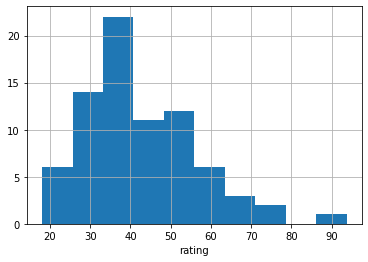

In [22]:
ax10 = cereals.rating.hist()
ax10.set_xlabel('rating')

In [23]:
#c-1

어떤 변수의 변동이 크냐고 물어봤으니, describe를 참고하여 분산을 확인해 변동을 알 수 있다.
이때 제일 큰 변동은 sodium 을 의미한다.

In [24]:
#c-2

히스토그램을 살펴보면 fiber가 가장 왼쪽으로 치우쳐 있다.

In [25]:
#c-3

potass의 최댓값이 다른 값에 비해 크게 나와 극단값으로 의심해 볼 수 있다.

In [26]:
#d

In [27]:
cereals2 = cereals[['type','calories']]
cereals2

,type,calories
0,C,70
1,C,120
2,C,70
3,C,50
4,C,110
...,...,...
72,C,110
73,C,110
74,C,100
75,C,100


<AxesSubplot:title={'center':'calories'}, xlabel='[type]'>

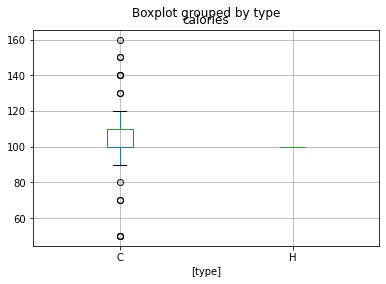

In [28]:
cereals2.boxplot(by='type') ##저온용에 이상치가 나타나는 것을 확인할 수 있다.

In [29]:
#e

In [30]:
cereals3 = cereals[['shelf','rating']]
cereals3

,shelf,rating
0,3,68.402973
1,3,33.983679
2,3,59.425505
3,3,93.704912
4,3,34.384843
...,...,...
72,3,39.106174
73,2,27.753301
74,1,49.787445
75,1,51.592193


<AxesSubplot:title={'center':'rating'}, xlabel='[shelf]'>

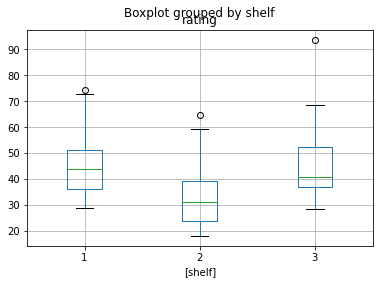

In [31]:
cereals3.boxplot(by='shelf') # 2일때의 평균이 유독 낮아 2와 그렇지 않은 1과 3을 묶어 두가지 범주로 나눠 판단하는 것이 적절하다

In [32]:
#f

In [ ]:
cereals.corr()

In [ ]:
cereals.corr().round(2)

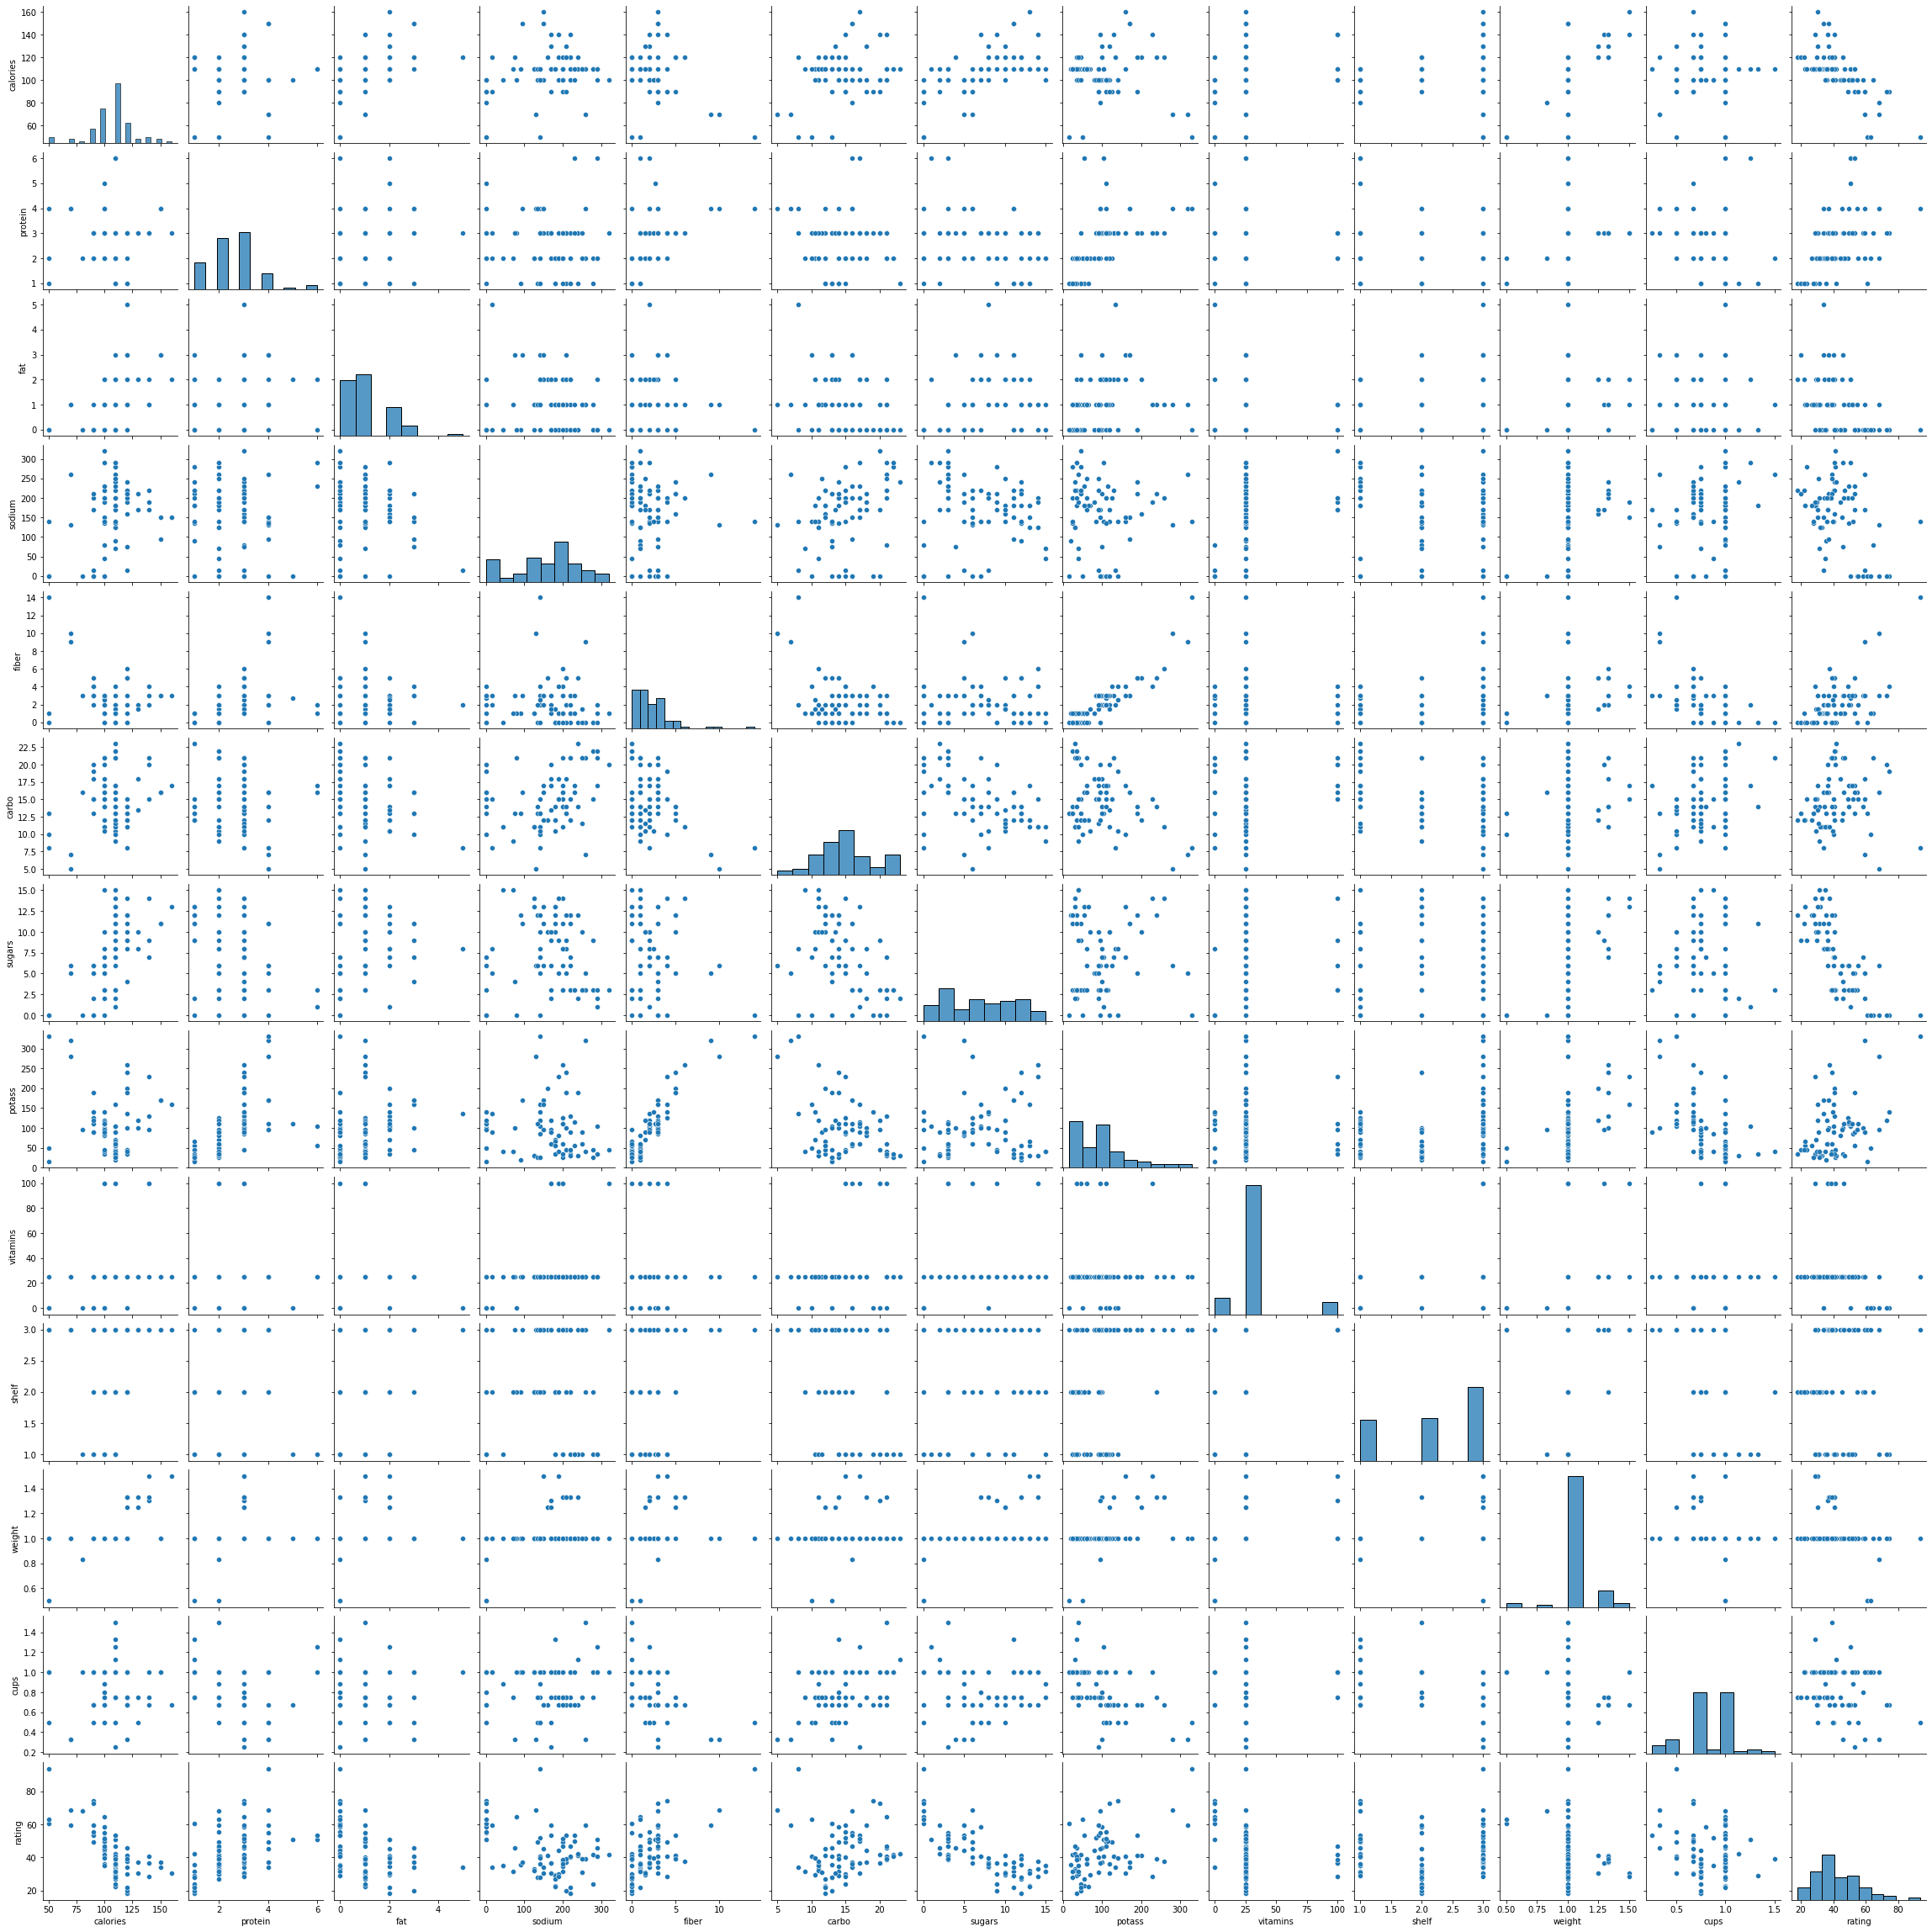

In [35]:
import seaborn as sns
sns.pairplot(cereals, diag_kind='hist')
plt.show()

1. potass 와 fiber 의 값이 제일 크다.
2. 1번을 통해 가장 큰 상관관계를 보여 둘 중 하나만 선택
3. (????)상관행렬은 정규화할 필요가 없고 정규화 한 후 상관관계의 변화는 동일하다.

In [36]:
#g 

총 변동 중 가장 많은 부분을 차지하고 있다. 나트륨이 가장 많이 차지하여 첫번째 주성분은 나트륨을 측정하는 것과 의미가 유사하다. 변수들의 스케일에 영향을 받기 때문에 이를 해결하기 위해 데이터를 정규화할 필요가 있다.

## 4.2

In [82]:
##a

In [83]:
univ =  pd.read_csv('Universities.csv')
univ

,College Name,State,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
0,Alaska Pacific University,AK,2,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,7560.0,1620.0,2500.0,130.0,800.0,1500.0,76.0,11.9,15.0
1,University of Alaska at Fairbanks,AK,1,1852.0,1427.0,928.0,NaN,NaN,3885.0,4519.0,1742.0,5226.0,1800.0,1790.0,155.0,650.0,2304.0,67.0,10.0,NaN
2,University of Alaska Southeast,AK,1,146.0,117.0,89.0,4.0,24.0,492.0,1849.0,1742.0,5226.0,2514.0,2250.0,34.0,500.0,1162.0,39.0,9.5,39.0
3,University of Alaska at Anchorage,AK,1,2065.0,1598.0,1162.0,NaN,NaN,6209.0,10537.0,1742.0,5226.0,2600.0,2520.0,114.0,580.0,1260.0,48.0,13.7,NaN
4,Alabama Agri. & Mech. Univ.,AL,1,2817.0,1920.0,984.0,NaN,NaN,3958.0,305.0,1700.0,3400.0,1108.0,1442.0,155.0,500.0,850.0,53.0,14.3,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,West Virginia State College,WV,1,1869.0,NaN,957.0,NaN,NaN,2817.0,1939.0,1988.0,4616.0,1500.0,1700.0,50.0,750.0,750.0,38.0,19.2,NaN
1298,West Virginia University,WV,1,9630.0,7801.0,2881.0,23.0,49.0,14524.0,1053.0,2128.0,6370.0,2284.0,2026.0,NaN,NaN,NaN,83.0,13.4,57.0
1299,West Virginia Wesleyan College,WV,2,1566.0,1400.0,483.0,28.0,55.0,1509.0,170.0,14200.0,14200.0,1750.0,2025.0,NaN,450.0,1100.0,58.0,16.4,67.0
1300,Wheeling Jesuit College,WV,2,903.0,755.0,213.0,15.0,49.0,971.0,305.0,10500.0,10500.0,2100.0,2445.0,NaN,600.0,600.0,66.0,14.1,72.0


In [84]:
univ.dtypes

College Name                 object
State                        object
Public (1)/ Private (2)       int64
# appli. rec'd              float64
# appl. accepted            float64
# new stud. enrolled        float64
% new stud. from top 10%    float64
% new stud. from top 25%    float64
# FT undergrad              float64
# PT undergrad              float64
in-state tuition            float64
out-of-state tuition        float64
room                        float64
board                       float64
add. fees                   float64
estim. book costs           float64
estim. personal $           float64
% fac. w/PHD                float64
stud./fac. ratio            float64
Graduation rate             float64
dtype: object

In [85]:
univ = univ.drop(columns=['College Name', 'State', 'Public (1)/ Private (2)'])
univ

,# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
0,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,7560.0,1620.0,2500.0,130.0,800.0,1500.0,76.0,11.9,15.0
1,1852.0,1427.0,928.0,NaN,NaN,3885.0,4519.0,1742.0,5226.0,1800.0,1790.0,155.0,650.0,2304.0,67.0,10.0,NaN
2,146.0,117.0,89.0,4.0,24.0,492.0,1849.0,1742.0,5226.0,2514.0,2250.0,34.0,500.0,1162.0,39.0,9.5,39.0
3,2065.0,1598.0,1162.0,NaN,NaN,6209.0,10537.0,1742.0,5226.0,2600.0,2520.0,114.0,580.0,1260.0,48.0,13.7,NaN
4,2817.0,1920.0,984.0,NaN,NaN,3958.0,305.0,1700.0,3400.0,1108.0,1442.0,155.0,500.0,850.0,53.0,14.3,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,1869.0,NaN,957.0,NaN,NaN,2817.0,1939.0,1988.0,4616.0,1500.0,1700.0,50.0,750.0,750.0,38.0,19.2,NaN
1298,9630.0,7801.0,2881.0,23.0,49.0,14524.0,1053.0,2128.0,6370.0,2284.0,2026.0,NaN,NaN,NaN,83.0,13.4,57.0
1299,1566.0,1400.0,483.0,28.0,55.0,1509.0,170.0,14200.0,14200.0,1750.0,2025.0,NaN,450.0,1100.0,58.0,16.4,67.0
1300,903.0,755.0,213.0,15.0,49.0,971.0,305.0,10500.0,10500.0,2100.0,2445.0,NaN,600.0,600.0,66.0,14.1,72.0


In [86]:
univ2=univ.dropna(axis=0) #결측치제거

In [87]:
##b

In [88]:
pcs = PCA()
pcs.fit(univ2)
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                           'Proportion of variance': pcs.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
Standard deviation,7430.9140,5987.9890,1854.6412,1192.5293,967.4279,679.6527,596.9761,580.6299,417.6136,318.1272,188.8676,155.6062,19.0491,12.5287,11.0184,5.33,2.9059
Proportion of variance,0.5614,0.3645,0.0350,0.0145,0.0095,0.0047,0.0036,0.0034,0.0018,0.0010,0.0004,0.0002,0.0000,0.0000,0.0000,0.00,0.0000
Cumulative proportion,0.5614,0.9259,0.9609,0.9753,0.9848,0.9895,0.9932,0.9966,0.9984,0.9994,0.9997,1.0000,1.0000,1.0000,1.0000,1.00,1.0000


In [89]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), columns=pcsSummary_df.columns, 
                                index=univ2.columns)
pcsComponents_df.iloc[:,:5]

,PC1,PC2,PC3,PC4,PC5
# appli. rec'd,0.271883,0.551183,0.664458,0.129476,-0.034246
# appl. accepted,0.194107,0.321299,0.190957,-0.008357,-0.076674
# new stud. enrolled,0.084730,0.101590,-0.087451,-0.055253,-0.036068
% new stud. from top 10%,-0.000898,0.001732,0.000136,-0.001906,0.001236
% new stud. from top 25%,-0.000811,0.001925,0.000040,-0.002352,0.001009
# FT undergrad,0.458121,0.492263,-0.635303,-0.284582,-0.080402
# PT undergrad,0.108253,0.073410,-0.285353,0.942562,-0.051743
in-state tuition,-0.670187,0.382489,-0.082787,-0.016972,-0.621759
out-of-state tuition,-0.454535,0.428685,-0.129410,0.018657,0.748634
room,-0.033420,0.055584,0.040113,0.065120,0.115354


첫번째 주성분에서 # FT undergrad이 가장 큰 부분을 차지하며 큰 지배성을 갖는다. 
데이터 정규화를 하여 이를 해결해야 한다.

## 4.3

In [56]:
toyota = pd.read_csv('ToyotaCorolla.csv')
toyota

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,1,0,0,0,1,0,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,0,1,1,1,0,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,1,0,0,1,1,0,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,1,0,0,0,1,0,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,1,0,0,0,0


In [57]:
#a

In [58]:
toyota.dtypes

Id                    int64
Model                object
Price                 int64
Age_08_04             int64
Mfg_Month             int64
Mfg_Year              int64
KM                    int64
Fuel_Type            object
HP                    int64
Met_Color             int64
Color                object
Automatic             int64
CC                    int64
Doors                 int64
Cylinders             int64
Gears                 int64
Quarterly_Tax         int64
Weight                int64
Mfr_Guarantee         int64
BOVAG_Guarantee       int64
Guarantee_Period      int64
ABS                   int64
Airbag_1              int64
Airbag_2              int64
Airco                 int64
Automatic_airco       int64
Boardcomputer         int64
CD_Player             int64
Central_Lock          int64
Powered_Windows       int64
Power_Steering        int64
Radio                 int64
Mistlamps             int64
Sport_Model           int64
Backseat_Divider      int64
Metallic_Rim        

In [59]:
toyota.Model = toyota.Model.astype('category') 
print(toyota.Model.cat.categories)    

Index(['TOYOTA Corolla ',
       'TOYOTA Corolla ! 1.6-16v vvt-i sol airco sedan 4/5-Doors',
       'TOYOTA Corolla 1 6-16v VVT-i Linea Terra Comfort Airco 5drs 4/5-Doors',
       'TOYOTA Corolla 1.3 16V 2/3-Doors',
       'TOYOTA Corolla 1.3 16V HATCHB 2/3-Doors',
       'TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors',
       'TOYOTA Corolla 1.3 16V HATCHB LINEA LUNA 2/3-Doors',
       'TOYOTA Corolla 1.3 16V HATCHB LINEA LUNA AUT3 2/3-Doors',
       'TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-Doors',
       'TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA AUT3 2/3-Doors',
       ...
       'TOYOTA Corolla LIFTBACK 1.6-16v Linea Luna 2/3-Doors',
       'TOYOTA Corolla LIFTBACK 1.6-16v Linea Luna 4/5-Doors',
       'TOYOTA Corolla LIFTBACK 1.9 D Linea Terra 4/5-Doors',
       'TOYOTA Corolla Liftback 1.6 VVTI 4/5-Doors',
       'TOYOTA Corolla Linea Luna 1.6i 16V 2/3-Doors',
       'TOYOTA Corolla Luna 5drs D4D116 PK 4/5-Doors',
       'TOYOTA Corolla Sw 20D Linea Terra Stationwagen',
      

In [60]:
toyota.Fuel_Type = toyota.Fuel_Type.astype('category') 
print(toyota.Fuel_Type.cat.categories)    

Index(['CNG', 'Diesel', 'Petrol'], dtype='object')


In [61]:
toyota.Color = toyota.Color.astype('category') 
print(toyota.Color.cat.categories)    

Index(['Beige', 'Black', 'Blue', 'Green', 'Grey', 'Red', 'Silver', 'Violet',
       'White', 'Yellow'],
      dtype='object')


In [ ]:
#b

In [90]:
toyota.dtypes

Id                      int64
Model                category
Price                   int64
Age_08_04               int64
Mfg_Month               int64
Mfg_Year                int64
KM                      int64
Fuel_Type            category
HP                      int64
Met_Color               int64
Color                category
Automatic               int64
CC                      int64
Doors                   int64
Cylinders               int64
Gears                   int64
Quarterly_Tax           int64
Weight                  int64
Mfr_Guarantee           int64
BOVAG_Guarantee         int64
Guarantee_Period        int64
ABS                     int64
Airbag_1                int64
Airbag_2                int64
Airco                   int64
Automatic_airco         int64
Boardcomputer           int64
CD_Player               int64
Central_Lock            int64
Powered_Windows         int64
Power_Steering          int64
Radio                   int64
Mistlamps               int64
Sport_Mode

컬러와 모델이 세분화된 것을 확인해 볼 수 있다.

In [ ]:
#c

n개의 범주가 있을 경우엔 n개의 가변수 또는 n-1개의 가변수가 필요하다 

In [62]:
#d

In [91]:
t2 = toyota.copy()
t2 = pd.get_dummies(t2, columns=["Fuel_Type", "Color"], prefix_sep='_', drop_first = True)
t2.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,...,Fuel_Type_Petrol,Color_Black,Color_Blue,Color_Green,Color_Grey,Color_Red,Color_Silver,Color_Violet,Color_White,Color_Yellow
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,90,1,0,...,0,0,1,0,0,0,0,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,90,1,0,...,0,0,0,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,90,1,0,...,0,0,1,0,0,0,0,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,90,0,0,...,0,1,0,0,0,0,0,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,90,0,0,...,0,1,0,0,0,0,0,0,0,0


Fuel_Type과 Color에 0과 1로 표시되어 있다면 해당 변수를 의미한다.

In [64]:
#e

In [97]:
t2.corr().round(2)

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,CC,...,Fuel_Type_Petrol,Color_Black,Color_Blue,Color_Green,Color_Grey,Color_Red,Color_Silver,Color_Violet,Color_White,Color_Yellow
Id,1.00,-0.74,0.91,0.04,-0.92,0.27,-0.11,-0.08,0.07,-0.12,...,0.16,-0.02,-0.00,0.08,-0.10,0.07,-0.04,0.00,0.04,-0.04
Price,-0.74,1.00,-0.88,-0.02,0.89,-0.57,0.31,0.11,0.03,0.13,...,-0.04,0.03,0.01,-0.10,0.17,-0.10,0.03,-0.02,-0.10,0.02
Age_08_04,0.91,-0.88,1.00,-0.12,-0.98,0.51,-0.16,-0.11,0.03,-0.10,...,0.09,-0.02,-0.03,0.10,-0.14,0.10,-0.03,0.02,0.05,-0.04
Mfg_Month,0.04,-0.02,-0.12,1.00,-0.06,-0.02,-0.04,0.03,0.01,0.04,...,-0.05,0.01,0.06,-0.03,-0.03,0.01,-0.02,-0.03,-0.00,0.00
Mfg_Year,-0.92,0.89,-0.98,-0.06,1.00,-0.50,0.16,0.10,-0.03,0.09,...,-0.08,0.02,0.02,-0.10,0.14,-0.10,0.03,-0.01,-0.05,0.04
KM,0.27,-0.57,0.51,-0.02,-0.50,1.00,-0.33,-0.08,-0.08,0.10,...,-0.43,0.04,-0.00,-0.02,-0.11,0.05,0.01,0.02,0.13,-0.04
HP,-0.11,0.31,-0.16,-0.04,0.16,-0.33,1.00,0.06,0.01,0.04,...,0.49,-0.00,-0.03,0.02,0.02,0.01,0.01,-0.01,-0.09,-0.00
Met_Color,-0.08,0.11,-0.11,0.03,0.10,-0.08,0.06,1.00,-0.02,0.03,...,0.00,0.06,0.04,0.08,0.07,-0.26,0.10,0.04,-0.20,0.03
Automatic,0.07,0.03,0.03,0.01,-0.03,-0.08,0.01,-0.02,1.00,0.07,...,0.08,-0.04,-0.01,0.06,0.00,-0.03,0.05,-0.01,-0.04,-0.01
CC,-0.12,0.13,-0.10,0.04,0.09,0.10,0.04,0.03,0.07,1.00,...,-0.32,-0.01,0.03,-0.01,-0.01,-0.01,-0.00,-0.02,0.03,-0.01


In [ ]:
import seaborn as sns
sns.pairplot(t2, diag_kind='hist')
plt.show() 

## 4.4

In [93]:
wine = pd.read_csv('Wine.csv')

In [95]:
#a  r 코드인 교재참고하여 읽음

PC1에 있는 변수중 Proline의 가장 큰 비중을 차지하고  0.9999으로 굉장히 높은 것으로 판단된다. 이때 해당 변수의 분산은 다른 분산들에 비해 높으며 따라서 첫번재 주성분의 분산이 다른 열의 분산보다 크게 나타난다.

In [96]:
#b

정규화된 데이터 사용 ....?